<a href="https://colab.research.google.com/github/RashmiThakre/Tasks.Codtech/blob/main/Task_6Codtech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib scikit-learn tensorflow keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [15]:
# Load the data
import zipfile
df = pd.read_csv('/content/credit5card_2023.csv')
# Display the first few rows of the dataset
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [18]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if necessary
df = df.dropna()

# Feature selection
X = df.drop(['id', 'V4'], axis=1)
y = df['V4']  # Binary target column (1 for fraud, 0 for non-fraud)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [21]:
# Feature selection
X = df.drop(['id', 'V4'], axis=1)
# Ensure y is binary by converting to integer type
y = df['V4'].astype(int)  # Binary target column (1 for fraud, 0 for non-fraud)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
isolation_forest.fit(X_train)

# Predict anomalies
y_pred_train = isolation_forest.predict(X_train)
y_pred_test = isolation_forest.predict(X_test)

# Convert predictions to binary (1 for anomaly, 0 for normal)
y_pred_train = [1 if x == -1 else 0 for x in y_pred_train]
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]

# Evaluate the model
print("Isolation Forest - Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))
print("Isolation Forest - Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_test))

Isolation Forest - Classification Report on Test Set:
              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         5
          -2       0.00      0.00      0.00        72
          -1       0.00      0.00      0.00       363
           0       0.75      1.00      0.86      1301
           1       0.00      0.00      0.00         0

    accuracy                           0.74      1741
   macro avg       0.15      0.20      0.17      1741
weighted avg       0.56      0.74      0.64      1741

Isolation Forest - Confusion Matrix on Test Set:
[[   0    0    0    4    1]
 [   0    0    0   72    0]
 [   0    0    0  357    6]
 [   0    0    0 1297    4]
 [   0    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [22]:
# Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X_train)

# Convert predictions to binary
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]

# Evaluate the model
print("Local Outlier Factor - Classification Report on Test Set:")
print(classification_report(y_train, y_pred_lof))

# Note: LOF doesn't directly apply to test set as it fits the entire set to find local outliers

Local Outlier Factor - Classification Report on Test Set:
              precision    recall  f1-score   support

          -3       0.00      0.00      0.00        16
          -2       0.00      0.00      0.00       294
          -1       0.00      0.00      0.00      1352
           0       0.76      0.99      0.86      5281
           1       0.04      0.18      0.07        17
           2       0.00      0.00      0.00         1

    accuracy                           0.75      6961
   macro avg       0.13      0.19      0.16      6961
weighted avg       0.58      0.75      0.65      6961



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0207 - val_loss: 0.8973
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9604 - val_loss: 0.8491
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9009 - val_loss: 0.8125
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8354 - val_loss: 0.7911
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8677 - val_loss: 0.7735
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8087 - val_loss: 0.7614
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8391 - val_loss: 0.7512
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7723 - val_loss: 0.7427
Epoch 9/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7475 - val_loss: 0.7351
Epoch 10/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7977 - val_loss: 0.7281
Epoch 11/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7302 - val_loss: 0.7218
Epoch 12/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

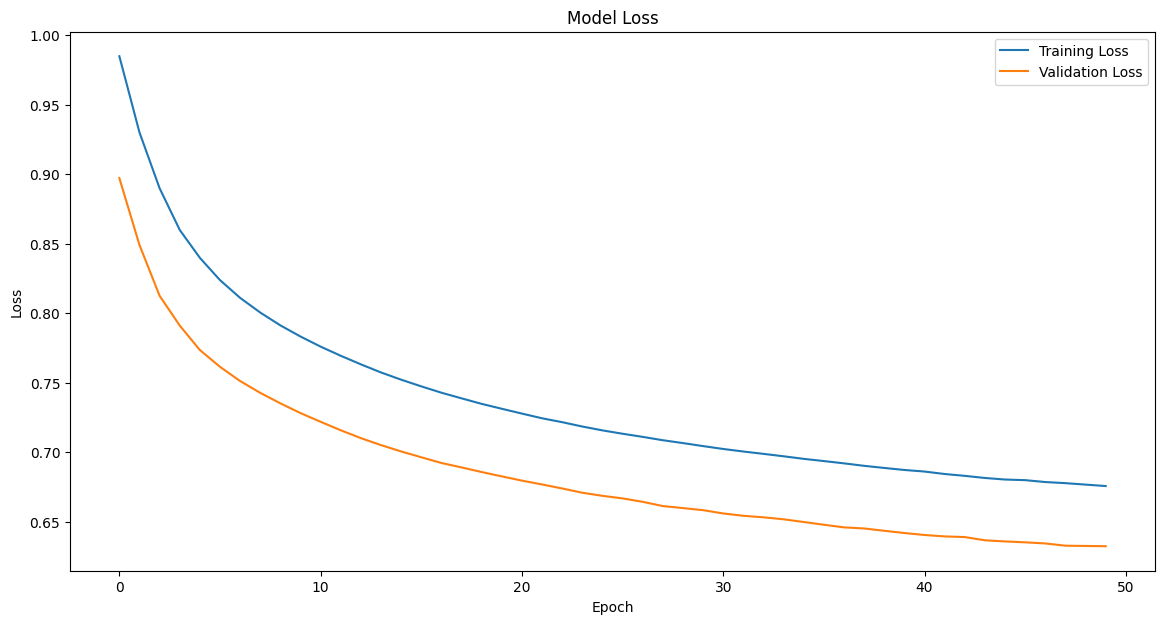

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Autoencoder - Classification Report on Test Set:
              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         5
          -2       0.00      0.00      0.00        72
          -1       0.00      0.00      0.00       363
           0       0.75      0.96      0.84      1301
           1       0.00      0.00      0.00         0

    accuracy                           0.71      1741
   macro avg       0.15      0.19      0.17      1741
weighted avg       0.56      0.71      0.63      1741

Autoencoder - Confusion Matrix on Test Set:
[[   0    0    0    4    1]
 [   0    0    0   68    4]
 [   0    0    0  339   24]
 [   0    0    0 1243   58]
 [   0    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [23]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 14  # Number of neurons in the bottleneck layer

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder layers
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

# Decoder layers
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Autoencoder
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1)

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Use the trained autoencoder to detect anomalies in the test set
reconstructions = autoencoder.predict(X_test)
reconstruction_errors = np.mean(np.abs(reconstructions - X_test), axis=1)

# Define a threshold for anomalies
threshold = np.percentile(reconstruction_errors, 95)  # 95th percentile threshold
y_pred_autoencoder = [1 if e > threshold else 0 for e in reconstruction_errors]

# Evaluate the model
print("Autoencoder - Classification Report on Test Set:")
print(classification_report(y_test, y_pred_autoencoder))

print("Autoencoder - Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_autoencoder))